In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
#To set size of df in python
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 1000)

In [16]:
dfeduc = pd.read_excel(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Datastore\US_educationa_attainment_metro.xlsx')
dfeduc.columns = dfeduc.columns.str.lower()
dfeduc.columns = dfeduc.columns.str.replace(' ','_')
dfeduc[['name','state_abbrv']] = dfeduc['name'].str.split(',',1,expand=True)
dfeduc.name = dfeduc.name.str.replace('-','')
dfeduc.name = dfeduc.name.str.replace(' ','')
dfeduc.name = dfeduc.name.str.lower()
dfeduc.name.sort_values(ascending=True).unique()
dfeduc.columns


Index(['name', 'ba+', 'other',
       'population_age_25+_with_at_least_a_bachelor's_degree_(2017)',
       'share_of_population_age_25+_with_at_least_a_bachelor's_degree',
       'share_(rank_out_of_388)',
       'percentage_point_increase:_share_of_population_age_25+_with_at_least_a_bachelor's_degree_(2007-2017)',
       'change_(rank_out_of_388)', '2007_ba+', '2012_ba+', '2017_ba+',
       'state_abbrv'],
      dtype='object')

In [23]:
#The best way to work with an api from Bea is to use the xml format over the json format.
#This is because vegalite cannot read large numbers in the json format of the api because there are commas in the numbers.
#Therefore I found it better to read the data in an xml format in Jupyter notebook and then conduct the analysis before taking the data into vegalite.

#https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetParameterValuesFiltered&datasetname=Regional&TargetParameter=LineCode&TableName=CAGDP1&ResultFormat=xml


#CAGDP1-3 GDP in current USD.
df = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAGDP1&LineCode=3&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df
#CAINC30-100 Total population.
df1 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=100&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df1
#CAINC30-190 Wages and Salaries.
df2 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=190&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df2
#CAINC30-300 Average Wages and Salaries for MSA
df3 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=300&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data") #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df3
#CAINC30-300 Average Wages and Salaries for MSA
df4 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=CAINC30&LineCode=300&Year=2018&GeoFips=MIC&ResultFormat=xml',xpath="//Data", encoding='cp1252') #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df4
#MARPP-1 Regional price parities [Indexed to US].
df5 = pd.read_xml('https://apps.bea.gov/api/data/?UserID=F88DCBE6-81B9-4A33-BDD9-F9B983466DEF&method=GetData&datasetname=Regional&TableName=MARPP&LineCode=1&Year=2018&GeoFips=MSA&ResultFormat=xml',xpath="//Data", encoding='cp1252') #Used api with apikey to get data from Bea. Needs to get Data in the element tree.
df5


,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,MARPP-1,10180,"Abilene, TX (Metropolitan Statistical Area)",2018,Index,0,93.791,None
1,MARPP-1,10420,"Akron, OH (Metropolitan Statistical Area)",2018,Index,0,94.255,None
2,MARPP-1,10500,"Albany, GA (Metropolitan Statistical Area)",2018,Index,0,87.756,None
3,MARPP-1,10540,"Albany-Lebanon, OR (Metropolitan Statistical A...",2018,Index,0,103.301,None
4,MARPP-1,10580,"Albany-Schenectady-Troy, NY (Metropolitan Stat...",2018,Index,0,99.569,None
...,...,...,...,...,...,...,...,...
379,MARPP-1,49420,"Yakima, WA (Metropolitan Statistical Area)",2018,Index,0,96.782,None
380,MARPP-1,49620,"York-Hanover, PA (Metropolitan Statistical Area)",2018,Index,0,97.688,None
381,MARPP-1,49660,"Youngstown-Warren-Boardman, OH-PA (Metropolita...",2018,Index,0,89.032,None
382,MARPP-1,49700,"Yuba City, CA (Metropolitan Statistical Area)",2018,Index,0,100.382,None


In [24]:
#For loop to clean data for all df from Bea API.
for z in [df, df1, df2, df3, df4]:
    i = z
    i.columns = i.columns.str.lower()
    i.columns = i.columns.astype('str').str.replace(' ','_')
    i.datavalue = i.datavalue.astype('str').str.replace(",",'')
    i.datavalue = i.datavalue.astype('float')
    i.geoname = i.geoname.str.replace(' ','')
    i.geoname = i.geoname.str.lower()
    i.geoname = i.geoname.str.replace('-','')
    i[['name','state_abbrv']] = i['geoname'].str.split(',',1,expand=True)
    i['comp_us_%'] = ((i['datavalue'] - i.datavalue[0])/i.datavalue[0])*100
    i['comp_avg_%'] = ((i['datavalue'] - i.datavalue.median())/i.datavalue.median())*100
    i['ln_dv'] = np.log(i.datavalue)




In [25]:
df5.columns = df5.columns.str.lower()
df5.columns = df5.columns.astype('str').str.replace(' ', '_')
df5.datavalue = df5.datavalue.astype('str').str.replace(",",'')
df5.datavalue = df5.datavalue.astype('float')
df5.geoname = df5.geoname.str.replace(' ','')
df5.geoname = df5.geoname.str.lower()
df5.geoname = df5.geoname.str.replace('-','')
df5[['name','state_abbrv']] = df5['geoname'].str.split(',',1,expand=True)

In [26]:
#Join all the df from the API together.
mdf = df.join(df1.set_index('geoname'),on='geoname',lsuffix='_df',rsuffix='_df1')
mdf = mdf.join(df2.set_index('geoname'),on='geoname',rsuffix='_df2')
mdf = mdf.join(df3.set_index('geoname'),on='geoname',rsuffix='_df3')
mdf = mdf.join(df5.set_index('geoname'),on='geoname',rsuffix='_df5')
mdf.columns
mdf['gdp_per_c'] = mdf['datavalue_df'] / mdf['datavalue_df1'] #Now I have gdp per capita for each MSA.
mdf['r_wge_sal'] = mdf['datavalue_df3'] / (mdf['datavalue_df5']/100) #Dividing average wage and sallary by the RPP (regional price parity).
#Dividing (nominal) wages by the RPP adjusts wages by the differences in the price levels between MSAs.
#High price levels would be a major determinant of higher wages and must be accounted for. 
mdf['ln_r_wge_sal'] = np.log(mdf['r_wge_sal']) #Convert to natural logarithm.
mdf['ln_gdp_per_c'] = np.log(mdf['gdp_per_c']) #Convert to natural logarithm.
mdf['comp_us_%_gdp_per_c'] = ((mdf['gdp_per_c'] - mdf.gdp_per_c[0])/mdf.datavalue[0])*100
mdf['comp_avg_%_gdp_per_c'] = ((mdf['gdp_per_c'] - mdf.gdp_per_c.median())/mdf.datavalue.median())*100
mmdf = mdf.join(dfeduc.set_index('name'),on='name',rsuffix='_educ') #Join the education dataset with the bea df.
mmdf['ba+_educm100'] = mmdf['ba+']*100 

In [12]:
mmdf.columns

Index(['code_df', 'geofips_df', 'geoname', 'timeperiod_df', 'cl_unit_df',
       'unit_mult_df', 'datavalue_df', 'noteref_df', 'name_df',
       'state_abbrv_df', 'comp_us_%_df', 'comp_avg_%_df', 'ln_dv_df',
       'code_df1', 'geofips_df1', 'timeperiod_df1', 'cl_unit_df1',
       'unit_mult_df1', 'datavalue_df1', 'noteref_df1', 'name_df1',
       'state_abbrv_df1', 'comp_us_%_df1', 'comp_avg_%_df1', 'ln_dv_df1',
       'code', 'geofips', 'timeperiod', 'cl_unit', 'unit_mult', 'datavalue',
       'noteref', 'name', 'state_abbrv', 'comp_us_%', 'comp_avg_%', 'ln_dv',
       'code_df3', 'geofips_df3', 'timeperiod_df3', 'cl_unit_df3',
       'unit_mult_df3', 'datavalue_df3', 'noteref_df3', 'name_df3',
       'state_abbrv_df3', 'comp_us_%_df3', 'comp_avg_%_df3', 'ln_dv_df3',
       'code_df5', 'geofips_df5', 'timeperiod_df5', 'cl_unit_df5',
       'unit_mult_df5', 'datavalue_df5', 'noteref_df5', 'name_df5',
       'state_abbrv_df5', 'gdp_per_c', 'r_wge_sal', 'ln_r_wge_sal',
       'ln_gdp_pe

(428, 76)
The Mean Squared Error is- 0.004178921853314135
0.6470784788434568
Coefficients: 
 [[ 0.32311103 -0.00118072  0.02484055]]
Variance score: 0.6470784788434568
Ttest_1sampResult(statistic=array([169.1689563 ,  16.98288697, 133.64442097]), pvalue=array([9.07087726e-136, 1.21255251e-032, 1.84150448e-124]))


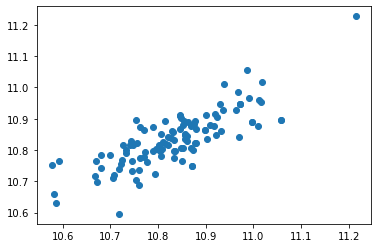

In [13]:
#Multiple linear regression
mmdf.columns
print(mmdf.shape)
mmdf = mmdf.sort_values(by='datavalue_df',ascending=False)
data = mmdf[1:]
yvar = 'ln_r_wge_sal'
x1var = 'ln_gdp_per_c'
x2var = "percentage_point_increase:_share_of_population_age_25+_with_at_least_a_bachelor's_degree_(2007-2017)"
x3var = 'ln_dv_df1'
data1 = data[data[x1var].notnull() & data[x2var].notnull() & data[x3var].notnull() & data[yvar].notnull()] #Combines the independent variables into a df.
x = data1[[x1var,x2var,x3var]] #Sets independent variables.
y = data1[[yvar]] #Sets Y variable.

from sklearn.model_selection import train_test_split
trains = 0.7 #Training sample will be 70% of the data. This is standard for MLR.
tests = 1 - trains #Test sample will be 30% of the data.
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = trains, test_size = tests, random_state = 10)
# The training and test samples are randomly selected. random_state = 10 ensures that the same random sample are kept.
# Otherwise the test and train samples will change each time this cell is run. 


from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
# Running the regression on the training sample.
# Python is learning on the training sample.
regressor.fit(X_train, y_train) 

#Predicting the Test set result 
y_pred = regressor.predict(X_test)


from sklearn.metrics import mean_squared_error 
#Calculates the MSE.
print("The Mean Squared Error is- {}".format(mean_squared_error(y_test, y_pred))) 

from sklearn.metrics import r2_score
#Calculates the R squared. 
print(r2_score(y_test,y_pred))
#This chart shows the outcome from the model.
plt.scatter(y_test,y_pred)
print('Coefficients: \n', regressor.coef_) #Shows the coefficients of the 3 regressors used in the model.
print('Variance score: {}'.format(regressor.score(X_test, y_test)))
import scipy
from scipy import stats

print(scipy.stats.ttest_1samp(X_test,popmean=0))
yt = pd.DataFrame(y_test)
yp = pd.DataFrame(y_pred)
#To create the df to convert to a csv that can be exported to Vegalite.
fdf1 = pd.DataFrame(data = X_test)

fdf1.columns = ['x1var','x2var','x3var']
fdf1['y_test'] = yt
yp.columns = ['y_pred']
fdf1['y_pred'] = regressor.predict(fdf1[['x1var','x2var','x3var']])
fdf1.head(2)
X_test = X_test[['x1var','x2var','x3var']]
fdf1.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\ml_bea_data.csv')
#https://raw.githubusercontent.com/107SBakst/107SBakst.github.io/main/data/ml_bea_data.csv

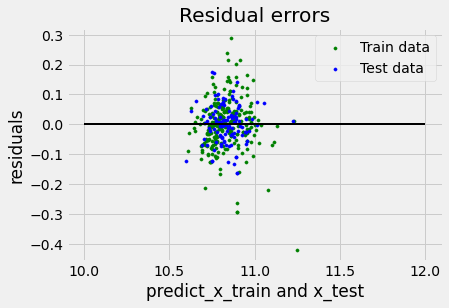

In [18]:
#This cell plots a residual chart on the test and train sample to see the outcome of the model.
plt.style.use('fivethirtyeight')
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 10, xmax = 12, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.xlabel('predict_x_train and x_test')
plt.ylabel('residuals')
plt.show()

In [27]:
#Are average wages in MSA statistically different from average wages in Micropolation areas.
df3 = df3[1:] #Removes USA total from df
df4 = df4[1:] #Removes USA total from df
print(df3.datavalue.mean()) # Mean average salary in MSA.
print(df3.datavalue.median()) # Median average salary in MSA.
print(df3.datavalue.std()) # Standard deviation of average salary in MSA.

print(df4.datavalue.mean()) # Mean average salary in MIC.
print(df4.datavalue.median()) # Median average salary in MIC.
print(df4.datavalue.std()) # Standard deviation of average salary in MIC.

t = ((df3.datavalue.mean() - df4.datavalue.mean())/ (((df3.datavalue.std())**2/len(df3.datavalue)) + (((df4.datavalue.std())**2)/len(df4.datavalue)))**0.5)
print(t) # Therefore we reject the null hypothesis that the average sallary in MSA areas is not different from the average sallary in MIC areas.


48700.307291666664
47080.5
8957.684574960747
41872.16051660517
41001.0
5766.338684188365
13.133317183155421
